# Proyecto final de la asignatura Minería de datos y el paradigma Big Data - curso 2022/23

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Rutas

In [110]:
path = './Data/'
file = 'itineraries_clean.csv'

## Limpieza del dataset

In [26]:
finalFile = 'itineraries_clean.csv'

columnsSelected = [ 'legId', 'searchDate', 'flightDate', 'startingAirport',
    'destinationAirport', 'travelDuration',
    'isBasicEconomy', 'totalFare',
    'seatsRemaining', 'totalTravelDistance', 
    'segmentsAirlineName', 'segmentsAirlineCode']

data = pd.read_csv(path + file,usecols=columnsSelected,index_col= None)
print(data)
data.to_csv(path + finalFile,index=False)

                                   legId  searchDate  flightDate  \
0       9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17   
1       98685953630e772a098941b71906592b  2022-04-16  2022-04-17   
2       98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17   
3       969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17   
4       980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17   
...                                  ...         ...         ...   
299995  90591f3aeeba1c88e66c64746299b28c  2022-04-17  2022-05-11   
299996  bc251918565f2c1aff1ea039220cfece  2022-04-17  2022-05-11   
299997  b6d15042b341b0845241af77866b97d0  2022-04-17  2022-05-11   
299998  55efe31162876477d2761abd5abb438d  2022-04-17  2022-05-11   
299999  e22ff727fea0f61ba78212ecc49b1992  2022-04-17  2022-05-11   

       startingAirport destinationAirport travelDuration  isBasicEconomy  \
0                  ATL                BOS        PT2H29M           False   
1                  ATL         

## Lectura del dataset

In [111]:
split = lambda x: x.split("||")

columnsSelected = [ 
    #'legId', 'searchDate',
    'flightDate', 'startingAirport',
    'destinationAirport', 'travelDuration',
    #'isBasicEconomy', 'totalFare',
    #'seatsRemaining', 'totalTravelDistance', 
    #'segmentsAirlineName', 'segmentsAirlineCode'
    ]

data = pd.read_csv(path + file,decimal='.',usecols=columnsSelected,)# parse_dates=['searchDate','flightDate'],)# converters={'segmentsAirlineName':split, 'segmentsAirlineCode':split})
data[:10]

,flightDate,startingAirport,destinationAirport,travelDuration
0,2022-04-17,ATL,BOS,PT2H29M
1,2022-04-17,ATL,BOS,PT2H30M
2,2022-04-17,ATL,BOS,PT2H30M
3,2022-04-17,ATL,BOS,PT2H32M
4,2022-04-17,ATL,BOS,PT2H34M
5,2022-04-17,ATL,BOS,PT2H38M
6,2022-04-17,ATL,BOS,PT4H12M
7,2022-04-17,ATL,BOS,PT5H18M
8,2022-04-17,ATL,BOS,PT5H32M
9,2022-04-17,ATL,BOS,PT6H38M


## Dividir datos en meses

## Media de coste de vuelos por mes

In [12]:
abril = data[data['flightDate'].dt.month == 4]['totalFare'].median()
mayo = data[data['flightDate'].dt.month == 5]['totalFare'].median()
junio = data[data['flightDate'].dt.month == 6]['totalFare'].median()
julio = data[data['flightDate'].dt.month == 7]['totalFare'].median()
agosto = data[data['flightDate'].dt.month == 8]['totalFare'].median()
septiembre = data[data['flightDate'].dt.month == 9]['totalFare'].median()
octubre  = data[data['flightDate'].dt.month == 10]['totalFare'].median()
noviembre = data[data['flightDate'].dt.month == 11]['totalFare'].median()

351.6

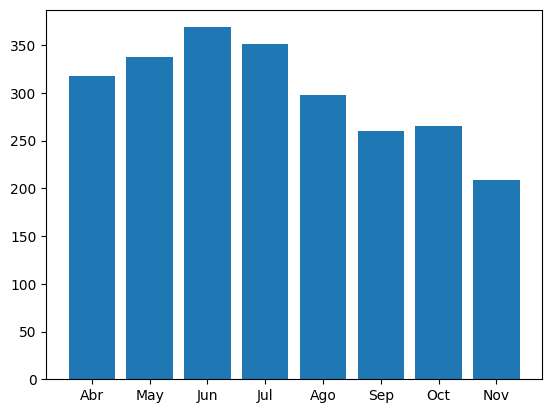

<Figure size 640x480 with 0 Axes>

In [13]:
meses = ['Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov']
MediaPrecioMes = np.array([
    abril,
    mayo,
    junio,
    julio,
    agosto,
    septiembre,
    octubre,
    noviembre
])

fig, ax = plt.subplots()
ax.bar(meses, MediaPrecioMes)

plt.show()
plt.savefig('MediaPrecioXMes.png')

## Top 10 vuelos más buscados

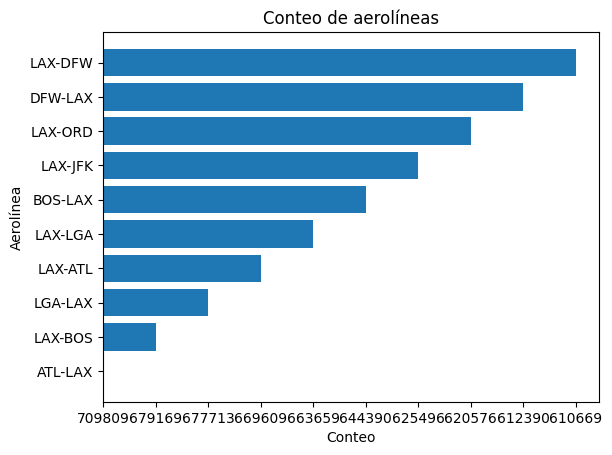

In [112]:
startAir = data['startingAirport'].unique()
destAir = data['destinationAirport'].unique()
list= []
count = []
origenDestino = []
for sAir in startAir:
    for dAir in destAir:
        count = len(data[(data['startingAirport'] == sAir) & (data['destinationAirport'] == dAir)])
        origenDestino = f'{sAir}-{dAir}'
        list.append([count,origenDestino])
list.sort(key = lambda x:x[0],reverse=True)
list = np.array(list)
plt.barh(list[:10,1], np.array(list[:10,0],dtype = int))
plt.title('Top 10 vuelos más repetidos')
plt.xlabel('Conteo')
plt.ylabel('Origen-Destino')
plt.show()
